In [2]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes("float64" ,"int64")
df = diamonds.copy()
df = diamonds.dropna()
df.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


# silme yöntemli

In [3]:
import numpy as np 
from sklearn.neighbors import LocalOutlierFactor

In [4]:
clf = LocalOutlierFactor(n_neighbors = 20 ,contamination = 0.1)
#komşuluk faktorü , yoğunluk


In [5]:
clf

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

In [6]:
clf.fit_predict(df) #fit etme (algoritma çalıştırma)

array([ 1, -1, -1, ...,  1,  1,  1])

In [7]:
df_score = clf.negative_outlier_factor_

In [8]:
df_score[0:20]

array([-1.11374289, -1.23429179, -1.2933565 , -1.26714354, -1.07513901,
       -1.08846786, -1.09451271, -1.0138337 , -1.64618253, -1.15038476,
       -1.15082332, -1.42358399, -1.8506426 , -0.96967916, -1.79876172,
       -0.99830379, -1.12219887, -1.01445729, -0.98400458, -1.0020063 ])

In [9]:
np.sort(df_score[0:20])#yalniş sıralama ilk 20 gözlemi sıralar

array([-1.8506426 , -1.79876172, -1.64618253, -1.42358399, -1.2933565 ,
       -1.26714354, -1.23429179, -1.15082332, -1.15038476, -1.12219887,
       -1.11374289, -1.09451271, -1.08846786, -1.07513901, -1.01445729,
       -1.0138337 , -1.0020063 , -0.99830379, -0.98400458, -0.96967916])

In [10]:
np.sort(df_score)[0:20] # doğru sıralama ,sıralar sonra ilk 20 gözlemi getirir

array([-29.3978291 , -26.46951036, -21.30748166, -18.01017463,
       -16.97514699, -16.62995733, -16.03576855, -14.32752813,
       -14.08761108, -13.6431223 , -13.54326147, -13.39416157,
       -12.07661152, -11.64375954, -11.34795868, -11.17339208,
       -10.41971572, -10.19053966, -10.13773379,  -9.94690686])

In [11]:
esik_deger = np.sort(df_score)[13]
esik_deger
# burada kendimize sınır skoru belirliyoruz

-11.643759538096306

In [12]:
aykiri_tf = df_score > esik_deger

In [13]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [14]:
yeni_df = df[df_score > esik_deger] # aykırı olmayan degerler

In [15]:
yeni_df

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [16]:
aykiri_df = df[df_score < esik_deger]

In [17]:
aykiri_df

,carat,depth,table,x,y,z
2274,1.22,62.6,59.0,6.79,4.24,3.76
4791,1.10,63.0,59.0,6.50,6.47,0.00
11182,1.07,61.6,56.0,0.00,6.62,0.00
14635,1.07,60.6,57.0,6.62,6.67,1.07
15235,1.12,61.6,58.0,6.64,4.11,3.70
21654,1.41,60.7,56.0,7.31,7.22,1.41
24067,2.00,58.9,57.0,8.09,58.90,8.06
24520,1.56,62.2,54.0,0.00,0.00,0.00
26243,1.20,62.1,59.0,0.00,0.00,0.00
27429,2.25,62.8,59.0,0.00,0.00,0.00


# baskılama yöntemi

In [65]:
df[df_score == esik_deger]

,carat,depth,table,x,y,z
20694,1.53,61.9,54.0,7.43,7.5,1.53


In [68]:
baski_deger = df[df_score == esik_deger]
baski_deger

,carat,depth,table,x,y,z
20694,1.53,61.9,54.0,7.43,7.5,1.53


In [75]:
aykirilar = df[~aykiri_tf]
aykirilar

,carat,depth,table,x,y,z
2274,1.22,62.6,59.0,6.79,4.24,3.76
4791,1.10,63.0,59.0,6.50,6.47,0.00
11182,1.07,61.6,56.0,0.00,6.62,0.00
14635,1.07,60.6,57.0,6.62,6.67,1.07
15235,1.12,61.6,58.0,6.64,4.11,3.70
20694,1.53,61.9,54.0,7.43,7.50,1.53
21654,1.41,60.7,56.0,7.31,7.22,1.41
24067,2.00,58.9,57.0,8.09,58.90,8.06
24520,1.56,62.2,54.0,0.00,0.00,0.00
26243,1.20,62.1,59.0,0.00,0.00,0.00


In [77]:
res = aykirilar.to_records(index = False) 
# indexini kapatarak numpy arrayıne cevirir

In [78]:
res

rec.array([(1.22, 62.6, 59. , 6.79,  4.24,  3.76),
           (1.1 , 63. , 59. , 6.5 ,  6.47,  0.  ),
           (1.07, 61.6, 56. , 0.  ,  6.62,  0.  ),
           (1.07, 60.6, 57. , 6.62,  6.67,  1.07),
           (1.12, 61.6, 58. , 6.64,  4.11,  3.7 ),
           (1.53, 61.9, 54. , 7.43,  7.5 ,  1.53),
           (1.41, 60.7, 56. , 7.31,  7.22,  1.41),
           (2.  , 58.9, 57. , 8.09, 58.9 ,  8.06),
           (1.56, 62.2, 54. , 0.  ,  0.  ,  0.  ),
           (1.2 , 62.1, 59. , 0.  ,  0.  ,  0.  ),
           (2.25, 62.8, 59. , 0.  ,  0.  ,  0.  ),
           (0.51, 61.8, 54.7, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. , 5.15, 31.8 ,  5.12),
           (0.5 , 63.7, 58. , 5.01,  5.04,  5.06)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [79]:
res[:] = baski_deger.to_records(index = False) 
#tüm aykırı degerleri baskı degerine cevirir 

In [80]:
res

rec.array([(1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53),
           (1.53, 61.9, 54., 7.43, 7.5, 1.53)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [82]:
df[~aykiri_tf] #bu yapıya uygulamamız lazım


,carat,depth,table,x,y,z
2274,1.22,62.6,59.0,6.79,4.24,3.76
4791,1.10,63.0,59.0,6.50,6.47,0.00
11182,1.07,61.6,56.0,0.00,6.62,0.00
14635,1.07,60.6,57.0,6.62,6.67,1.07
15235,1.12,61.6,58.0,6.64,4.11,3.70
20694,1.53,61.9,54.0,7.43,7.50,1.53
21654,1.41,60.7,56.0,7.31,7.22,1.41
24067,2.00,58.9,57.0,8.09,58.90,8.06
24520,1.56,62.2,54.0,0.00,0.00,0.00
26243,1.20,62.1,59.0,0.00,0.00,0.00


In [87]:
import pandas as pd

df[~aykiri_tf] = pd.DataFrame(res , index = df[~aykiri_tf].index)
df[~aykiri_tf]

,carat,depth,table,x,y,z
2274,1.53,61.9,54.0,7.43,7.5,1.53
4791,1.53,61.9,54.0,7.43,7.5,1.53
11182,1.53,61.9,54.0,7.43,7.5,1.53
14635,1.53,61.9,54.0,7.43,7.5,1.53
15235,1.53,61.9,54.0,7.43,7.5,1.53
20694,1.53,61.9,54.0,7.43,7.5,1.53
21654,1.53,61.9,54.0,7.43,7.5,1.53
24067,1.53,61.9,54.0,7.43,7.5,1.53
24520,1.53,61.9,54.0,7.43,7.5,1.53
26243,1.53,61.9,54.0,7.43,7.5,1.53


In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = np.random.normal(70 , 3 ,(100,2))
X_inliers = np.r_[X_inliers + 10 ,X_inliers -10] #r fonknksiyonu indeksiz işlem yapmak için

print(X_inliers.shape)
print(X_inliers[:3 ,:2])


(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [26]:
X_outliers = np.random.uniform(low = 15 , high =130 , size = (20 ,2))
# aykırı gözlem oluşturuyoruz

X_outliers

array([[ 98.50050338, 127.22298914],
       [ 74.37454005,  52.13999439],
       [106.4464124 ,  46.1457089 ],
       [ 65.48171338,  24.02248385],
       [ 17.91533549, 125.70456769],
       [111.13771386,  95.0370337 ],
       [ 62.02958861,  34.92884681],
       [ 32.99025991,  43.77793329],
       [ 78.16106644,  97.17853111],
       [ 90.92269832,  47.19239815],
       [124.80950728,  99.85814542],
       [ 78.75071604,  85.34788582],
       [ 63.25400718,  43.48906379],
       [ 55.93685804, 102.1523027 ],
       [ 16.65525119,  28.34835366],
       [ 20.29030383,  19.68381227],
       [113.37796716,  95.92065383],
       [ 69.52999035,  26.25092847],
       [ 71.53582564,  69.44925364],
       [ 34.91821504,  64.89293966]])

In [29]:
X = np.r_[X_inliers ,X_outliers]
# burada iki arrayı birleştiriyoruz,
X[0:3 , :]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [35]:
LOF = LocalOutlierFactor(n_neighbors = 20 , contamination = 0.1)
# n_neigbors = komşu sayısı 
LOF
# Bu işlem model parametreleri belirleme işlemidir

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

In [36]:
LOF.fit_predict(X)
# evet içie gönderdiğimiz değerler ile score belirliyourz

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [39]:
X_score = LOF.negative_outlier_factor_
# evet kendilerinme özgü scorlar oluşturuyoruz 

In [40]:
X_score[0:3]

array([-0.99920793, -1.13553412, -0.97212675])

In [41]:
X_score.mean()

-1.7101579751054918

In [42]:
X_score.std()

2.2322650360725698

In [43]:
np.sort(X_score)[:10]

array([-17.44657527, -11.31523699, -10.82322569, -10.78627971,
       -10.56355832, -10.25179385,  -8.97349375,  -8.69612432,
        -8.59342773,  -8.55970472])

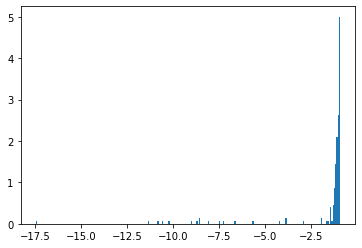

In [50]:
plt.hist(X_score , bins = "auto" ,density = True)
plt.show()

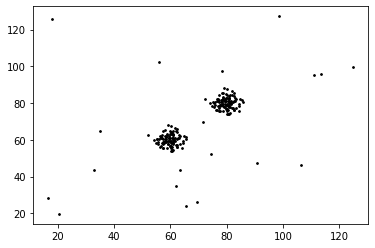

In [61]:
plt.scatter(x = X[: ,0] ,y = X[:,1] ,color = "k" ,s=3 );
# s = nokto boyutu

In [64]:
X_score

array([ -0.99920793,  -1.13553412,  -0.97212675,  -1.32791607,
        -0.96972687,  -0.96802782,  -1.1805622 ,  -1.19791797,
        -1.01579889,  -1.15267042,  -1.2201011 ,  -1.05831363,
        -0.97114708,  -1.02682711,  -0.96154064,  -1.29456713,
        -1.01699286,  -1.10234974,  -1.19346895,  -1.05776887,
        -1.05003045,  -0.96442079,  -1.15370196,  -1.04367008,
        -1.13388154,  -0.97715087,  -0.98000248,  -1.1355711 ,
        -0.98956357,  -1.02127897,  -0.95728791,  -1.16047442,
        -1.13480421,  -0.98898424,  -0.99185635,  -1.11530981,
        -1.12335025,  -1.93473522,  -0.95681998,  -1.19901531,
        -0.94274169,  -1.25772079,  -1.01278495,  -1.1176248 ,
        -0.98406477,  -0.98958804,  -0.97848957,  -1.1047896 ,
        -0.99278983,  -0.96275604,  -1.09594137,  -0.97642952,
        -0.94886824,  -1.43916596,  -0.963528  ,  -1.28645716,
        -1.44871535,  -0.9450553 ,  -1.04606649,  -1.17036587,
        -1.0681155 ,  -1.29733998,  -1.3158382 ,  -1.06

In [68]:
X_score.max() - X_score  # evet cortları pozitif yaptık 

array([5.73502929e-02, 1.93676483e-01, 3.02691119e-02, 3.86058435e-01,
       2.78692326e-02, 2.61701811e-02, 2.38704560e-01, 2.56060331e-01,
       7.39412515e-02, 2.10812779e-01, 2.78243465e-01, 1.16455992e-01,
       2.92894377e-02, 8.49694671e-02, 1.96829986e-02, 3.52709495e-01,
       7.51352229e-02, 1.60492100e-01, 2.51611312e-01, 1.15911229e-01,
       1.08172809e-01, 2.25631499e-02, 2.11844323e-01, 1.01812440e-01,
       1.92023897e-01, 3.52932323e-02, 3.81448441e-02, 1.93713457e-01,
       4.77059327e-02, 7.94213267e-02, 1.54302756e-02, 2.18616786e-01,
       1.92946567e-01, 4.71266047e-02, 4.99987098e-02, 1.73452176e-01,
       1.81492611e-01, 9.92877578e-01, 1.49623445e-02, 2.57157668e-01,
       8.84047042e-04, 3.15863148e-01, 7.09273089e-02, 1.75767163e-01,
       4.22071309e-02, 4.77304016e-02, 3.66319312e-02, 1.62931964e-01,
       5.09321959e-02, 2.08984009e-02, 1.54083728e-01, 3.45718803e-02,
       7.01060514e-03, 4.97308324e-01, 2.16703628e-02, 3.44599524e-01,
      

In [66]:
X_score.max() - X_score.min()

16.504717633107266

In [80]:
radius = radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

In [81]:
radius

array([3.47478183e-03, 1.17346135e-02, 1.83396727e-03, 2.33907931e-02,
       1.68856161e-03, 1.58561823e-03, 1.44628078e-02, 1.55143721e-02,
       4.48000706e-03, 1.27728801e-02, 1.68584202e-02, 7.05592151e-03,
       1.77461004e-03, 5.14819271e-03, 1.19256803e-03, 2.13702229e-02,
       4.55234828e-03, 9.72401365e-03, 1.52448117e-02, 7.02291498e-03,
       6.55405391e-03, 1.36707276e-03, 1.28353800e-02, 6.16868718e-03,
       1.16344854e-02, 2.13837238e-03, 2.31114793e-03, 1.17368538e-02,
       2.89044222e-03, 4.81203790e-03, 9.34900914e-04, 1.32457150e-02,
       1.16903889e-02, 2.85534147e-03, 3.02935869e-03, 1.05092483e-02,
       1.09964081e-02, 6.01571987e-02, 9.06549558e-04, 1.55808584e-02,
       5.35632939e-05, 1.91377493e-02, 4.29739608e-03, 1.06495105e-02,
       2.55727676e-03, 2.89192476e-03, 2.21948245e-03, 9.87184196e-03,
       3.08591743e-03, 1.26620772e-03, 9.33573851e-03, 2.09466657e-03,
       4.24763713e-04, 3.01312834e-02, 1.31297992e-03, 2.08788500e-02,
      

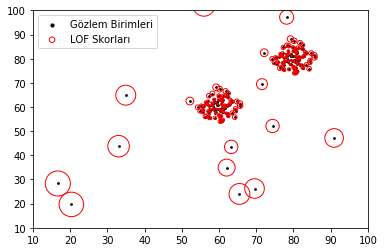

In [82]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors='r', 
            facecolors='none',label='LOF Skorları')

plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]


In [83]:
X[:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [84]:
np.sort(X_score)[:9]

array([-17.44657527, -11.31523699, -10.82322569, -10.78627971,
       -10.56355832, -10.25179385,  -8.97349375,  -8.69612432,
        -8.59342773])

In [86]:
esik_deger = np.sort(X_score)[9]
esik_deger

-8.55970472070754

In [88]:
(X_score > esik_deger)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [89]:
tf_vektor = (X_score > esik_deger)

In [91]:
X[~tf_vektor]
# aykırı olmayanlar

array([[ 98.50050338, 127.22298914],
       [106.4464124 ,  46.1457089 ],
       [ 17.91533549, 125.70456769],
       [111.13771386,  95.0370337 ],
       [ 32.99025991,  43.77793329],
       [124.80950728,  99.85814542],
       [ 55.93685804, 102.1523027 ],
       [ 16.65525119,  28.34835366],
       [ 20.29030383,  19.68381227],
       [113.37796716,  95.92065383]])

In [92]:
X[X_score < esik_deger]

array([[ 98.50050338, 127.22298914],
       [106.4464124 ,  46.1457089 ],
       [ 17.91533549, 125.70456769],
       [111.13771386,  95.0370337 ],
       [124.80950728,  99.85814542],
       [ 55.93685804, 102.1523027 ],
       [ 16.65525119,  28.34835366],
       [ 20.29030383,  19.68381227],
       [113.37796716,  95.92065383]])